### Downloading Dataset from Kaggle

Source: https://www.kaggle.com/datasets/jsrojas/ip-network-traffic-flows-labeled-with-87-apps

In [ ]:
! pip  install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d jsrojas/ip-network-traffic-flows-labeled-with-87-apps

 99% 509M/514M [00:03<00:00, 190MB/s]
100% 514M/514M [00:03<00:00, 152MB/s]


In [ ]:
! ls

drive						   kaggle.json
ip-network-traffic-flows-labeled-with-87-apps.zip  sample_data


In [ ]:
! unzip ip-network-traffic-flows-labeled-with-87-apps.zip

Archive:  ip-network-traffic-flows-labeled-with-87-apps.zip
  inflating: Dataset-Unicauca-Version2-87Atts.csv  


In [ ]:
! ls

Dataset-Unicauca-Version2-87Atts.csv		   kaggle.json
drive						   sample_data
ip-network-traffic-flows-labeled-with-87-apps.zip


In [ ]:
# Saving in Google Drive as well
# ! cp Dataset-Unicauca-Version2-87Atts.csv /content/drive/MyDrive/

### Importing Required Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import time
import math

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset-Unicauca-Version2-87Atts.csv')
# df = pd.read_csv('Dataset-Unicauca-Version2-87Atts.csv')
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [ ]:
df.shape

(3577296, 87)

In [3]:
df.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  

In [9]:
# Attributes with object datatype
object_df = df.select_dtypes(include = ["object"])
object_col = object_df.columns
object_df.head()

,Flow.ID,Source.IP,Destination.IP,Timestamp,Label,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,10.200.7.7,26/04/201711:11:17,BENIGN,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,172.19.1.46,26/04/201711:11:17,BENIGN,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,10.200.7.217,26/04/201711:11:17,BENIGN,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,10.200.7.217,26/04/201711:11:17,BENIGN,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,10.200.7.7,26/04/201711:11:17,BENIGN,HTTP_PROXY


In [ ]:
# No. of unique values in all object columns
[(col, object_df[col].nunique()) for col in object_col]

[('Flow.ID', 1522917),
 ('Source.IP', 6566),
 ('Destination.IP', 22824),
 ('Timestamp', 41915),
 ('Label', 1),
 ('ProtocolName', 78)]

In [35]:
def summarize_column(data, column):
  sorted_value = sorted(data[column].value_counts().iteritems(), key = lambda x: x[1], reverse = True)
  remaining_percentage = 100
  data_length = len(data)
  for (value, count) in sorted_value:
    percentage = count/data_length*100
    if percentage >= 1:
      print(f'{value}: {percentage:.2f}%')
    else:
      print(f'Other: {remaining_percentage:.2f}%')
      break
    remaining_percentage = remaining_percentage - percentage

In [ ]:
# Summarizing columns
for col in object_col:
  print(f'Summary of {col}')
  summarize_column(object_df, col)
  print()

Summary of Flow.ID
Other: 100.00%

Summary of Source.IP
10.200.7.218: 8.26%
10.200.7.217: 7.49%
10.200.7.199: 6.28%
10.200.7.195: 5.34%
10.200.7.194: 5.08%
10.200.7.196: 4.93%
10.200.7.9: 3.47%
10.200.7.6: 3.00%
10.200.7.5: 2.85%
10.200.7.4: 2.84%
10.200.7.8: 2.58%
10.200.7.7: 2.51%
Other: 45.37%

Summary of Destination.IP
10.200.7.8: 9.03%
10.200.7.7: 8.81%
10.200.7.9: 6.25%
10.200.7.5: 5.46%
10.200.7.6: 5.34%
10.200.7.4: 5.16%
10.200.7.218: 1.08%
10.200.7.217: 1.05%
Other: 57.83%

Summary of Timestamp
Other: 100.00%

Summary of Label
BENIGN: 100.00%

Summary of ProtocolName
GOOGLE: 26.81%
HTTP: 19.11%
HTTP_PROXY: 17.42%
SSL: 11.32%
HTTP_CONNECT: 8.88%
YOUTUBE: 4.77%
AMAZON: 2.43%
MICROSOFT: 1.53%
GMAIL: 1.13%
Other: 6.60%



In [11]:
drop_object_col = ['Label', 'Timestamp', 'Flow.ID']

In [10]:
# Attributes with numerical datatypes
num_col = list(set(df.columns) - set(object_col))
num_df = df[num_col]
num_df.head()

,Bwd.Avg.Bytes.Bulk,Fwd.Avg.Bulk.Rate,Packet.Length.Variance,Destination.Port,Active.Min,Subflow.Fwd.Bytes,Flow.Duration,Fwd.IAT.Total,Avg.Fwd.Segment.Size,Idle.Max,...,SYN.Flag.Count,Protocol,Fwd.IAT.Min,Init_Win_bytes_backward,Fwd.URG.Flags,Flow.Bytes.s,Bwd.IAT.Mean,Total.Length.of.Bwd.Packets,Bwd.URG.Flags,Total.Fwd.Packets
0,0,0,1.257940e+06,3128,0.0,132,45523,45523.0,6.000000,0.0,...,0,6,698.0,490,0,2.428355e+06,762.555556,110414.0,0,22
1,0,0,0.000000e+00,52422,0.0,12,1,1.0,6.000000,0.0,...,0,6,1.0,-1,0,1.200000e+07,0.000000,0.0,0,2
2,0,0,2.839225e+04,38848,0.0,674,1,1.0,224.666667,0.0,...,1,6,0.0,-1,0,6.740000e+08,0.000000,0.0,0,3
3,0,0,0.000000e+00,38848,0.0,0,217,0.0,0.000000,0.0,...,0,6,0.0,490,0,0.000000e+00,53.500000,0.0,0,1
4,0,0,8.205870e+04,3128,0.0,1076,78068,78068.0,215.200000,0.0,...,1,6,0.0,-1,0,1.378286e+04,0.000000,0.0,0,5


In [ ]:
# Checking the no. of null/na values
df.isna().sum()

Flow.ID             0
Source.IP           0
Source.Port         0
Destination.IP      0
Destination.Port    0
                   ..
Idle.Max            0
Idle.Min            0
Label               0
L7Protocol          0
ProtocolName        0
Length: 87, dtype: int64

In [ ]:
# No. of unique values in all numerical columns
[(col, num_df[col].nunique()) for col in num_col]

[('act_data_pkt_fwd', 7609),
 ('Fwd.Packet.Length.Max', 7737),
 ('PSH.Flag.Count', 2),
 ('Active.Max', 589454),
 ('Idle.Max', 702678),
 ('Bwd.Avg.Packets.Bulk', 1),
 ('Flow.IAT.Min', 104891),
 ('Fwd.Avg.Bytes.Bulk', 1),
 ('FIN.Flag.Count', 2),
 ('Packet.Length.Std', 1674168),
 ('Active.Mean', 653020),
 ('Packet.Length.Variance', 1669723),
 ('RST.Flag.Count', 2),
 ('Init_Win_bytes_forward', 20139),
 ('Packet.Length.Mean', 810255),
 ('Fwd.Avg.Bulk.Rate', 1),
 ('Fwd.Packets.s', 2293417),
 ('CWE.Flag.Count', 1),
 ('SYN.Flag.Count', 2),
 ('Bwd.IAT.Total', 1657080),
 ('Source.Port', 40519),
 ('Flow.Packets.s', 2352220),
 ('Idle.Min', 783592),
 ('Fwd.Packet.Length.Min', 1761),
 ('Flow.IAT.Max', 1724972),
 ('URG.Flag.Count', 2),
 ('Min.Packet.Length', 1096),
 ('Fwd.Packet.Length.Mean', 422885),
 ('Fwd.PSH.Flags', 2),
 ('Total.Length.of.Fwd.Packets', 104568),
 ('min_seg_size_forward', 9),
 ('Bwd.PSH.Flags', 1),
 ('Bwd.URG.Flags', 1),
 ('ECE.Flag.Count', 2),
 ('Fwd.IAT.Max', 1642105),
 ('Average

In [12]:
# Numerical columns having single unique value - to be dropped
single_num_col = [col for col in num_col if num_df[col].nunique() == 1]
single_num_col

['Bwd.Avg.Bytes.Bulk',
 'Fwd.Avg.Bulk.Rate',
 'Fwd.Avg.Bytes.Bulk',
 'Bwd.Avg.Packets.Bulk',
 'Bwd.Avg.Bulk.Rate',
 'Bwd.PSH.Flags',
 'CWE.Flag.Count',
 'Fwd.Avg.Packets.Bulk',
 'Fwd.URG.Flags',
 'Bwd.URG.Flags']

In [ ]:
[(col, num_df[col].nunique()) for col in num_col if num_df[col].nunique() <= 50]

[('PSH.Flag.Count', 2),
 ('Bwd.Avg.Packets.Bulk', 1),
 ('Fwd.Avg.Bytes.Bulk', 1),
 ('FIN.Flag.Count', 2),
 ('RST.Flag.Count', 2),
 ('Fwd.Avg.Bulk.Rate', 1),
 ('CWE.Flag.Count', 1),
 ('SYN.Flag.Count', 2),
 ('URG.Flag.Count', 2),
 ('Fwd.PSH.Flags', 2),
 ('min_seg_size_forward', 9),
 ('Bwd.PSH.Flags', 1),
 ('Bwd.URG.Flags', 1),
 ('ECE.Flag.Count', 2),
 ('ACK.Flag.Count', 2),
 ('Fwd.Avg.Packets.Bulk', 1),
 ('Bwd.Avg.Bulk.Rate', 1),
 ('Protocol', 3),
 ('Fwd.URG.Flags', 1),
 ('Down.Up.Ratio', 48),
 ('Bwd.Avg.Bytes.Bulk', 1)]

In [13]:
corr = num_df.corr()
corr

,Bwd.Avg.Bytes.Bulk,Fwd.Avg.Bulk.Rate,Packet.Length.Variance,Destination.Port,Active.Min,Subflow.Fwd.Bytes,Flow.Duration,Fwd.IAT.Total,Avg.Fwd.Segment.Size,Idle.Max,...,SYN.Flag.Count,Protocol,Fwd.IAT.Min,Init_Win_bytes_backward,Fwd.URG.Flags,Flow.Bytes.s,Bwd.IAT.Mean,Total.Length.of.Bwd.Packets,Bwd.URG.Flags,Total.Fwd.Packets
Bwd.Avg.Bytes.Bulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fwd.Avg.Bulk.Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packet.Length.Variance,NaN,NaN,1.000000,-0.105286,0.062078,0.054415,0.057100,0.045731,0.237922,-0.009931,...,-0.030087,-0.006372,-0.065826,0.045723,NaN,0.046687,-0.083729,0.141043,NaN,0.102234
Destination.Port,NaN,NaN,-0.105286,1.000000,0.005581,0.040772,0.097343,0.106323,0.139804,0.035380,...,0.265786,-0.006353,-0.025127,0.082371,NaN,0.083854,0.140237,-0.018461,NaN,0.029131
Active.Min,NaN,NaN,0.062078,0.005581,1.000000,0.036450,0.108134,0.107169,0.100217,0.061776,...,0.049882,0.065863,-0.013596,0.010989,NaN,-0.004330,-0.009914,0.038657,NaN,0.061991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Flow.Bytes.s,NaN,NaN,0.046687,0.083854,-0.004330,-0.001079,-0.033938,-0.032687,0.146920,-0.027655,...,0.076282,-0.000830,-0.009366,-0.013637,NaN,1.000000,-0.017524,-0.001705,NaN,-0.002577
Bwd.IAT.Mean,NaN,NaN,-0.083729,0.140237,-0.009914,-0.008021,0.498692,0.477141,-0.025896,0.568181,...,0.303059,-0.004110,0.490733,0.031491,NaN,-0.017524,1.000000,-0.012585,NaN,-0.015362
Total.Length.of.Bwd.Packets,NaN,NaN,0.141043,-0.018461,0.038657,0.000971,0.049509,0.047776,-0.014462,-0.000077,...,0.003727,0.000341,-0.006940,-0.001740,NaN,-0.001705,-0.012585,1.000000,NaN,0.425549
Bwd.URG.Flags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


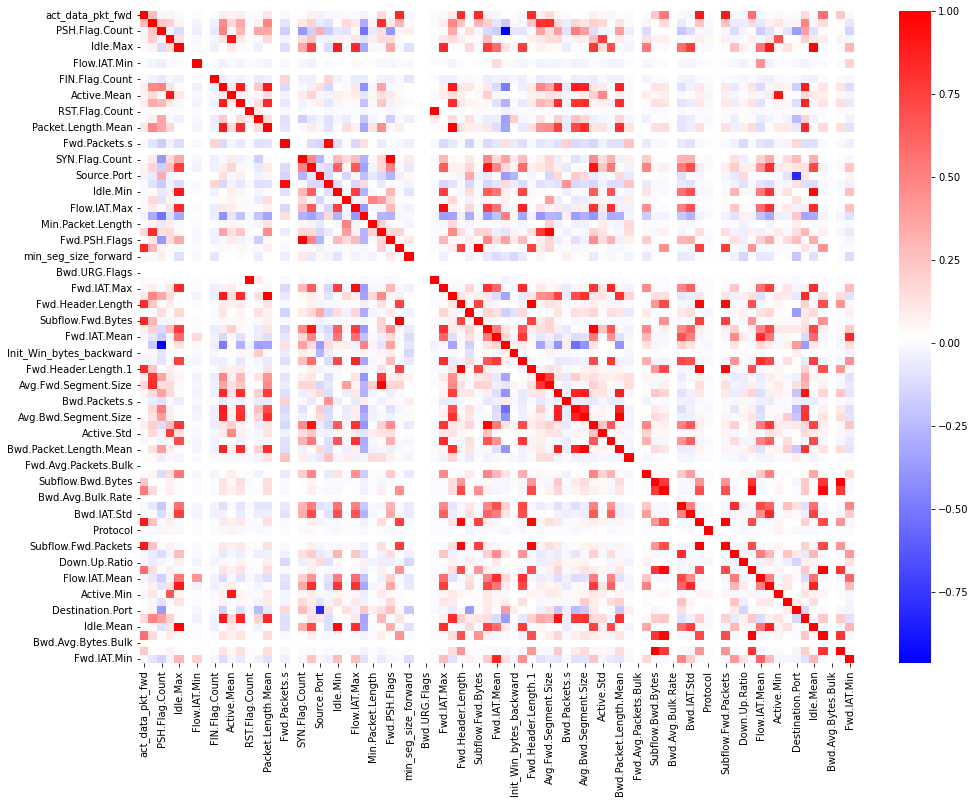

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='bwr', annot=False) 

In [14]:
up_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
up_tri

,Bwd.Avg.Bytes.Bulk,Fwd.Avg.Bulk.Rate,Packet.Length.Variance,Destination.Port,Active.Min,Subflow.Fwd.Bytes,Flow.Duration,Fwd.IAT.Total,Avg.Fwd.Segment.Size,Idle.Max,...,SYN.Flag.Count,Protocol,Fwd.IAT.Min,Init_Win_bytes_backward,Fwd.URG.Flags,Flow.Bytes.s,Bwd.IAT.Mean,Total.Length.of.Bwd.Packets,Bwd.URG.Flags,Total.Fwd.Packets
Bwd.Avg.Bytes.Bulk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fwd.Avg.Bulk.Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packet.Length.Variance,NaN,NaN,NaN,-0.105286,0.062078,0.054415,0.057100,0.045731,0.237922,-0.009931,...,-0.030087,-0.006372,-0.065826,0.045723,NaN,0.046687,-0.083729,0.141043,NaN,0.102234
Destination.Port,NaN,NaN,NaN,NaN,0.005581,0.040772,0.097343,0.106323,0.139804,0.035380,...,0.265786,-0.006353,-0.025127,0.082371,NaN,0.083854,0.140237,-0.018461,NaN,0.029131
Active.Min,NaN,NaN,NaN,NaN,NaN,0.036450,0.108134,0.107169,0.100217,0.061776,...,0.049882,0.065863,-0.013596,0.010989,NaN,-0.004330,-0.009914,0.038657,NaN,0.061991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Flow.Bytes.s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.017524,-0.001705,NaN,-0.002577
Bwd.IAT.Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012585,NaN,-0.015362
Total.Length.of.Bwd.Packets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425549
Bwd.URG.Flags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Columns having very high(> 95%) correlation - to be dropped
high_corr_col = [col for col in up_tri.columns if any(np.fabs(up_tri[col]) > 0.95)]
print("Length:", len(high_corr_col))
high_corr_col

Length: 18


['Fwd.IAT.Total',
 'Idle.Mean',
 'Fwd.Header.Length',
 'Bwd.Packet.Length.Mean',
 'Idle.Min',
 'PSH.Flag.Count',
 'Fwd.Packet.Length.Mean',
 'Total.Backward.Packets',
 'Fwd.Packets.s',
 'Subflow.Fwd.Packets',
 'ECE.Flag.Count',
 'Total.Length.of.Fwd.Packets',
 'Subflow.Bwd.Packets',
 'Flow.IAT.Max',
 'Average.Packet.Size',
 'SYN.Flag.Count',
 'Total.Length.of.Bwd.Packets',
 'Total.Fwd.Packets']

In [16]:
len(list(set(high_corr_col) - set(single_num_col)))

18

### Data Cleaning

In [18]:
df_c = df.copy()

In [19]:
# Drop irrelevant object columns
df_c.drop(drop_object_col, axis = 1, inplace = True)

In [20]:
# Drop single unique numerical columns
df_c.drop(single_num_col, axis = 1, inplace = True)

In [21]:
# Drop numerical columns with very high correlation
df_c.drop(high_corr_col, axis = 1, inplace = True)

In [22]:
df_c.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Std,Idle.Max,L7Protocol,ProtocolName
0,172.19.1.46,52422,10.200.7.7,3128,6,45523,6,6,0.000000,4380,...,21,20,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
1,10.200.7.7,3128,172.19.1.46,52422,6,1,6,6,0.000000,0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
2,50.31.185.39,80,10.200.7.217,38848,6,1,337,0,194.567041,0,...,1,32,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
3,50.31.185.39,80,10.200.7.217,38848,6,217,0,0,0.000000,0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
4,192.168.72.43,55961,10.200.7.7,3128,6,78068,529,6,286.458898,0,...,4,20,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY


In [23]:
# Drop columns having source & destination ip and port no. as it will not help in classifying applications
ip_add_cols = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port']
df_c.drop(ip_add_cols, axis = 1, inplace = True)

In [24]:
df_c.head()

,Protocol,Flow.Duration,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Std,Idle.Max,L7Protocol,ProtocolName
0,6,45523,6,6,0.000000,4380,1187,768.481689,2.428355e+06,1.691453e+03,...,21,20,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
1,6,1,6,6,0.000000,0,0,0.000000,1.200000e+07,2.000000e+06,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
2,6,1,337,0,194.567041,0,0,0.000000,6.740000e+08,3.000000e+06,...,1,32,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
3,6,217,0,0,0.000000,0,0,0.000000,0.000000e+00,1.843318e+04,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
4,6,78068,529,6,286.458898,0,0,0.000000,1.378286e+04,6.404673e+01,...,4,20,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY


In [25]:
# Saving cleaned dataset in Google Drive
# df_c.to_csv('/content/drive/MyDrive/df_cleaned.csv', index = False)

### Preprocessing

In [2]:
# Importing from Google Drive (in-case runtime environment failed)
import pandas as pd
df_c = pd.read_csv('/content/drive/MyDrive/df_cleaned.csv')
df_c

,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Std,Idle.Max,L7Protocol,ProtocolName
0,6,45523,22,55,132,6,6,6.000000,0.000000,4380,...,21,20,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
1,6,1,2,0,12,6,6,6.000000,0.000000,0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
2,6,1,3,0,674,337,0,224.666667,194.567041,0,...,1,32,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
3,6,217,1,3,0,0,0,0.000000,0.000000,0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
4,6,78068,5,0,1076,529,6,215.200000,286.458898,0,...,4,20,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577291,6,2290821,5,4,599,599,0,119.800000,267.880944,1460,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,91,SSL
3577292,6,24,5,0,1448,1448,0,289.600000,647.565286,0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,91,SSL
3577293,6,2591653,6,5,1202,601,0,200.333333,310.355065,2092,...,1,32,0.0,0.0,0.0,0.0,0.0,0.0,91,SSL
3577294,6,2622421,4,3,632,352,0,158.000000,184.795382,2352,...,1,32,0.0,0.0,0.0,0.0,0.0,0.0,91,SSL


In [3]:
# Selecting first 200000 records only! (Because of memory overflow)
df_c = df_c.iloc[:200000, :]

In [4]:
# Label encoding target column(ProtocolName)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(df_c['ProtocolName'])
df_c['ProtocolName'] = encoder.fit_transform(df_c['ProtocolName'])
df_c['ProtocolName']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0         19
1         19
2         16
3         16
4         19
          ..
199995    14
199996    14
199997    14
199998    14
199999    14
Name: ProtocolName, Length: 200000, dtype: int64

In [5]:
x = df_c.drop(columns = ['ProtocolName'])
y = df_c['ProtocolName']

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x)
x_scaled = scaler.fit_transform(x)
x_scaled

array([[3.52941176e-01, 3.79350006e-04, 7.82487191e-05, ...,
        0.00000000e+00, 0.00000000e+00, 5.80645161e-01],
       [3.52941176e-01, 0.00000000e+00, 3.72612948e-06, ...,
        0.00000000e+00, 0.00000000e+00, 5.80645161e-01],
       [3.52941176e-01, 0.00000000e+00, 7.45225897e-06, ...,
        0.00000000e+00, 0.00000000e+00, 9.21658986e-03],
       ...,
       [3.52941176e-01, 8.42500014e-06, 1.49045179e-05, ...,
        0.00000000e+00, 0.00000000e+00, 5.57603687e-01],
       [3.52941176e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.57603687e-01],
       [3.52941176e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.57603687e-01]])

In [7]:
x_s = pd.DataFrame(x_scaled)
x_s

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.352941,0.000379,0.000078,0.000101,2.636449e-07,0.000228,0.000637,0.000637,0.000000,0.140205,...,0.007492,0.000078,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.580645
1,0.352941,0.000000,0.000004,0.000000,2.396771e-08,0.000228,0.000637,0.000637,0.000000,0.000000,...,0.000000,0.000004,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.580645
2,0.352941,0.000000,0.000007,0.000000,1.346187e-06,0.012823,0.000000,0.023850,0.033370,0.000000,...,0.000000,0.000004,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.009217
3,0.352941,0.000002,0.000000,0.000006,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007492,0.000000,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.009217
4,0.352941,0.000651,0.000015,0.000000,2.149105e-06,0.020129,0.000637,0.022845,0.049130,0.000000,...,0.000000,0.000015,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.580645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.352941,0.001078,0.000034,0.000017,1.633799e-06,0.013813,0.000000,0.008684,0.025622,0.008707,...,0.004562,0.000011,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.557604
199996,0.352941,0.001939,0.000138,0.000061,9.563118e-06,0.050875,0.000000,0.013376,0.052580,0.065557,...,0.004364,0.000060,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.557604
199997,0.352941,0.000008,0.000015,0.000004,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.002017,...,0.004364,0.000000,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.557604
199998,0.352941,0.000000,0.000000,0.000002,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004364,0.000000,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.557604


In [8]:
y

0         19
1         19
2         16
3         16
4         19
          ..
199995    14
199996    14
199997    14
199998    14
199999    14
Name: ProtocolName, Length: 200000, dtype: int64

### Modelling

In [ ]:
summarize_column(pd.DataFrame(y, columns=['ProtocolName']), 'ProtocolName')

16: 28.08%
14: 27.22%
34: 13.76%
19: 10.96%
17: 4.75%
45: 4.43%
0: 1.93%
23: 1.47%
13: 1.01%
Other: 6.39%


#### Train-Test Data Split

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_s, y, test_size=0.2, random_state=42)

#### XGBoost

In [12]:
import xgboost
xgb_classify = xgboost.XGBClassifier()
xgb_classify.fit(x_train, y_train)
xgb_pred = xgb_classify.predict(x_test)

In [13]:
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_prec = precision_score(y_test, xgb_pred, average='micro')
xgb_rec = recall_score(y_test, xgb_pred, average='micro')
xgb_f1 = f1_score(y_test, xgb_pred, average='micro')
print(f"Accuracy: {xgb_acc}, Precision: {xgb_prec}, Recall: {xgb_rec}, F1: {xgb_f1}")

Accuracy: 0.99995, Precision: 0.99995, Recall: 0.99995, F1: 0.99995


In [ ]:
# xgb_classify.save_model('/content/drive/MyDrive/NP-Project/xgb_classify.h5')
pkl.dump(xgb_classify, open('/content/drive/MyDrive/NP-Project/xgb_classify.pkl', 'wb'))

In [10]:
xgb_classify = pkl.load(open('/content/drive/MyDrive/NP-Project/xgb_classify.pkl', 'rb'))

#### Supoort Vector Machine

In [10]:
from sklearn.svm import SVC
svm_classify = SVC()
svm_classify.fit(x_train, y_train)
svm_pred = svm_classify.predict(x_test)

In [ ]:
svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred, average='micro')
svm_rec = recall_score(y_test, svm_pred, average='micro')
svm_f1 = f1_score(y_test, svm_pred, average='micro')
print(f"Accuracy: {svm_acc}, Precision: {svm_prec}, Recall: {svm_rec}, F1: {svm_f1}")

Accuracy: 0.892175, Precision: 0.892175, Recall: 0.892175, F1: 0.892175


In [ ]:
pkl.dump(svm_classify, open('/content/drive/MyDrive/NP-Project/svm_classify.pkl', 'wb'))

In [14]:
svm_classify = pkl.load(open('/content/drive/MyDrive/NP-Project/svm_classify.pkl', 'rb'))

#### ANN ?

In [ ]:
import tensorflow as tf
ann_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(52,)),
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(78, activation='sigmoid')
])

ann_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# ann_model.fit(x_train, y_train, epochs=5)
# ann_pred = ann_model.predict(x_test)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classify = RandomForestClassifier()
rf_classify.fit(x_train, y_train)
rf_pred = rf_classify.predict(x_test)

In [42]:
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='micro')
rf_rec = recall_score(y_test, rf_pred, average='micro')
rf_f1 = f1_score(y_test, rf_pred, average='micro')
print(f"Accuracy: {rf_acc}, Precision: {rf_prec}, Recall: {rf_rec}, F1: {rf_f1}")

Accuracy: 0.88695, Precision: 0.88695, Recall: 0.88695, F1: 0.88695


In [ ]:
pkl.dump(rf_classify, open('/content/drive/MyDrive/NP-Project/rf_classify.pkl', 'wb'))

In [39]:
rf_classify = pkl.load(open('/content/drive/MyDrive/NP-Project/rf_classify.pkl', 'rb'))

### Result

In [ ]:
result = [[xgb_acc, xgb_prec, xgb_rec, xgb_f1],
          [svm_acc, svm_prec, svm_rec, svm_f1],
          [rf_acc, rf_prec, rf_rec, rf_f1]]
result_df = pd.DataFrame(result, columns=["Accuracy", "Precision", "Recall", "F1"], index= ["XGB", "SVM", "RF"])
result_df

,Accuracy,Precision,Recall,F1
XGB,0.999950,0.999950,0.999950,0.999950
SVM,0.892175,0.892175,0.892175,0.892175
RF,0.986000,0.986000,0.986000,0.986000


In [ ]:
result_df.to_csv('/content/drive/MyDrive/NP-Project/result.csv')

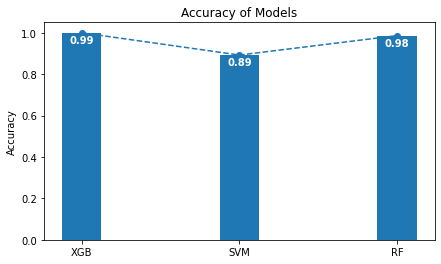

In [95]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]-0.05, math.floor(y[i]*100)/100, ha = 'center', color = 'white',fontweight = 'bold')

plt.figure(figsize=(7, 4))
plt.bar(result_df.index, result_df['Accuracy'], width=0.25)
addlabels(result_df.index, result_df['Accuracy'])
plt.plot(result_df['Accuracy'], linestyle='dashed', marker='o')
plt.title("Accuracy of Models")
plt.ylabel("Accuracy")
plt.savefig("/content/drive/MyDrive/NP-Project/accuracy.png")

#### Output

In [96]:
x_test.shape

(40000, 51)

In [12]:
y_pred = xgb_classify.predict(x_test)
y_pred = encoder.inverse_transform(y_pred)
y_pred

array(['GOOGLE', 'GOOGLE', 'SSL', ..., 'YOUTUBE', 'SSL', 'HTTP_PROXY'],
      dtype=object)

In [98]:
print('Classified Application Protocols\n')
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.value_counts()

Classified Application Protocols



HTTP              11338
GOOGLE            10909
SSL                5501
HTTP_PROXY         4317
HTTP_CONNECT       1862
YOUTUBE            1776
AMAZON              751
MICROSOFT           595
GMAIL               407
WINDOWS_UPDATE      346
SKYPE               335
CLOUDFLARE          288
YAHOO               279
DROPBOX             269
FACEBOOK            255
TWITTER             170
MSN                 147
CONTENT_FLASH        84
WIKIPEDIA            72
APPLE                66
MS_ONE_DRIVE         30
SSL_NO_CERT          25
OFFICE_365           22
WHATSAPP             21
NETFLIX              20
EBAY                 17
APPLE_ICLOUD         16
INSTAGRAM            14
IP_ICMP              13
APPLE_ITUNES         10
UBUNTUONE            10
DNS                   8
GOOGLE_MAPS           7
HTTP_DOWNLOAD         5
TOR                   3
TWITCH                3
CITRIX                3
MQTT                  2
TEAMVIEWER            2
OPENSIGNAL            1
FTP_DATA              1
dtype: int64

In [48]:
def summarize_output(data, column):
  sorted_value = sorted(data[column].value_counts().iteritems(), key = lambda x: x[1], reverse = True)
  label = []
  counts = []
  remaining_percentage = 100
  remaining_len = data_length = len(data)
  for (value, count) in sorted_value:
    percentage = count/data_length*100
    if percentage >= 1:
      label.append(value)
      counts.append(count)
    else:
      label.append('Other')
      counts.append(remaining_len)
      break
    remaining_percentage = remaining_percentage - percentage
    remaining_len = remaining_len - count
  return label, counts

In [49]:
label, count = summarize_output(y_pred_df, 0)

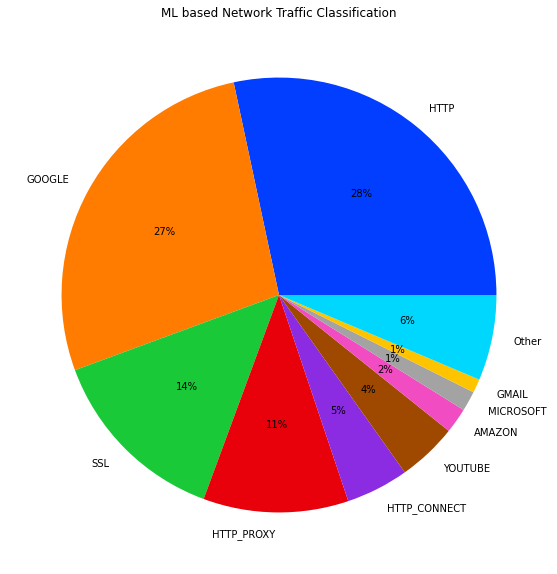

In [68]:
palette_color = sns.color_palette('bright')
plt.figure(figsize=(10, 10))
plt.pie(count, labels=label, colors=palette_color, autopct='%.0f%%')
plt.title("ML based Network Traffic Classification")
plt.plot()
plt.savefig("/content/drive/MyDrive/NP-Project/result.png")